<a href="https://colab.research.google.com/github/hayatu4islam/AppliedTimeSeriesAnalysisWithPython/blob/main/Time_Series_Forecasting_using_Deep_Learning_(From_a_Book).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Forecasting using Deep Learning

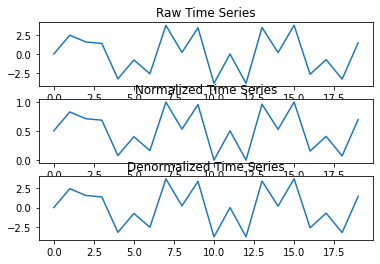

In [1]:
import random
from math import sin, cos
import matplotlib.pyplot as plt
def normalize(ts):
  max_ts = max(ts)
  min_ts = min(ts)
  normal_ts = [(v - min_ts) / (max_ts - min_ts) for v in ts]
  return normal_ts, max_ts, min_ts
def denormalize(ts, max_ts, min_ts):
  denormal_ts = [v * (max_ts - min_ts) + min_ts for v in ts]
  return denormal_ts
if __name__ == '__main__':
  random.seed(1)
  ts = [10 * sin(i) * cos(i) * cos(i) for i in range(20)]
  normal_ts, max_ts, min_ts = normalize(ts)
  denormal_ts = denormalize(normal_ts, max_ts, min_ts)
  fig = plt.figure()
  ax1 = fig.add_subplot(311)
  ax2 = fig.add_subplot(312)
  ax3 = fig.add_subplot(313)
  ax1.set_title("Raw Time Series")
  ax1.plot(ts)
  ax2.set_title("Normalized Time Series")
  ax2.plot(normal_ts)
  ax3.set_title("Denormalized Time Series")
  ax3.plot(denormal_ts)
  plt.show()

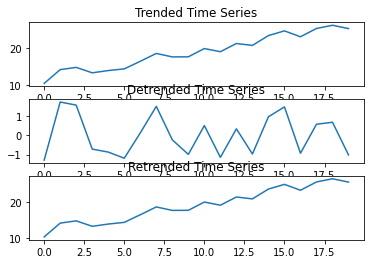

In [3]:
## Trend removal
import random
from math import sin
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
def detrend(ts):
  X = [[i] for i in range(len(ts))]
  y = np.array(ts).reshape(-1, 1)
  reg = LinearRegression().fit(X, y)
  a = reg.coef_[0][0]
  b = reg.intercept_[0]
  detrend_ts = [(ts[i] - a * i - b) for i in range(len(ts))]
  return detrend_ts, a, b
def retrend(ts, a, b):
  return [(ts[i] + a * i + b) for i in range(len(ts))]
if __name__ == '__main__':
  random.seed(1)
  ts = [10 + .8 * i + sin(i) + 3 * random.random() for i in range(20)]
  detrend_ts, a, b = detrend(ts)
  retrend_ts = retrend(detrend_ts, a, b)
  fig = plt.figure()
  ax1 = fig.add_subplot(311)
  ax2 = fig.add_subplot(312)
  ax3 = fig.add_subplot(313)
  ax1.set_title("Trended Time Series")
  ax1.plot(ts)
  ax2.set_title("Detrended Time Series")
  ax2.plot(detrend_ts)
  ax3.set_title("Retrended Time Series")
  ax3.plot(retrend_ts)
  plt.show()

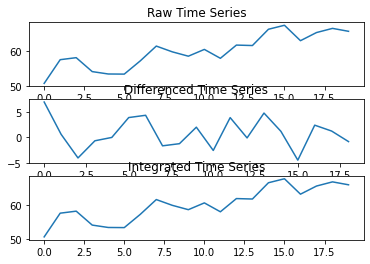

In [4]:
## Differencing
import random
from math import sin
import matplotlib.pyplot as plt
def differencing(ts):
  diff_ts = [(ts[i + 1] - ts[i]) for i in range(len(ts) - 1)]
  return diff_ts, ts[0]
def integration(ts, b):
  int_ts = [b]
  for i in range(len(ts)):
    int_ts.append(ts[i] + int_ts[i])
  return int_ts
if __name__ == '__main__':
  random.seed(1)
  ts = [50 + .8 * i + 3 * sin(i) + 5 * random.random() for i in range(20)]
  diff_ts, b = differencing(ts)
  int_ts = integration(diff_ts, b)
  fig = plt.figure()
  ax1 = fig.add_subplot(311)
  ax2 = fig.add_subplot(312)
  ax3 = fig.add_subplot(313)
  ax1.set_title("Raw Time Series")
  ax1.plot(ts)
  ax2.set_title("Differenced Time Series")
  ax2.plot(diff_ts)
  ax3.set_title("Integrated Time Series")
  ax3.plot(int_ts)
  plt.show()

In [5]:
## Sliding window
def sliding_window(ts, features):
  X = []
  Y = []
  for i in range(features + 1, len(ts) + 1):
    X.append(ts[i - (features + 1):i - 1])
    Y.append([ts[i - 1]])
  return X, Y
if __name__ == '__main__':
  ts = list(range(6))
  X, Y = sliding_window(ts, 3)
  print(f'Time series: {ts}')
  print(f'X: {X}')
  print(f'Y: {Y}')

# Result
# Time series: [0, 1, 2, 3, 4, 5]
# X: [[0, 1, 2], [1, 2, 3], [2, 3, 4]]
# Y: [[3], [4], [5]]

Time series: [0, 1, 2, 3, 4, 5]
X: [[0, 1, 2], [1, 2, 3], [2, 3, 4]]
Y: [[3], [4], [5]]


ALTERNATIVE MODELS
SARIMA

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import torch
class SarimaxPredictor(torch.nn.Module):
  def forward(self, x):
    last_values = []
    l = x.tolist()
    counter = 0
    for r in l:
      model = SARIMAX(r,
             order = (1, 1, 1),
             seasonal_order = (1, 1, 1, 12))
      results = model.fit(disp = 0)
      forecast = results.forecast()
      last_values.append([forecast[0]])
      counter = counter + 1
      print(f'debug: SARIMA calculation {counter} / {len(l)}')
      return torch.tensor(data = last_values)

RNN PyTorch Implementation

In [1]:
# rnn.py
import torch.nn as nn
class RNN(nn.Module):
  def __init__(self,
           hidden_size,
           in_size = 1,
           out_size = 1):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(
      input_size = in_size,
      hidden_size = hidden_size,
      batch_first = True)
    self.fc = nn.Linear(hidden_size, out_size)
  def forward(self, x, h = None):
    out, _ = self.rnn(x, h)
    last_hidden_states = out[:, -1]
    out = self.fc(last_hidden_states)
    return out, last_hidden_states

In [2]:
import matplotlib.pyplot as plt
from ch4.training_datasets import get_aep_timeseries
plt.title('AEP Hourly')
plt.plot(get_aep_timeseries()[:500])
plt.show()

ModuleNotFoundError: ignored

In [3]:
import sys
print(sys.maxsize)

9223372036854775807


# **Encoder-decoder model**

In [1]:
# import libraries
import numpy as np
import random
import torch
import torch.nn as nn
from torch import optim

In [2]:
# Encoder layer using LSTM
class Encoder(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers = 1):
    super(Encoder, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers)
  def forward(self, x):
    flat = x.view(x.shape[0], x.shape[1], self.input_size)
    out, h = self.lstm(flat)
    return out, h

In [3]:
# Decoder layer
class Decoder(nn.Module):
  def __init__(self, input_size, hidden_size, output_size = 1, num_layers = 1):
    super(Decoder, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.output_size = output_size
    self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers)
    self.linear = nn.Linear(hidden_size, output_size)
  def forward(self, x, h):
    out, h = self.lstm(x.unsqueeze(0), h)
    y = self.linear(out.squeeze(0))
    return y, h

In [4]:
# Encoder-decoder model
class EncoderDecoder(nn.Module):
  def __init__(self, hidden_size, input_size = 1, output_size = 1):
    super(EncoderDecoder, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.encoder = Encoder(input_size = input_size, hidden_size = hidden_size)
    self.decoder = Decoder(input_size = input_size, hidden_size = hidden_size, output_size = output_size)

In [ ]:
# Training
def train_model(
      self, train, target, epochs, target_len, method = 'recursive',
      tfr = 0.5, lr = 0.01, dynamic_tf = False):

  # Defining optimiser and loss function
  losses = np.full(epochs, np.nan)
  optimizer = optim.Adam(self.parameters(), lr = lr)
  criterion = nn.MSELoss()
  for e in range(epochs):
    predicted = torch.zeros(target_len, train.shape[1], train.shape[2])
    optimizer.zero_grad()
    _, enc_h = self.encoder(train)
    dec_in = train[-1, :, :]
    dec_h = enc_h

  if method == 'recursive':
    for t in range(target_len):
      dec_out, dec_h = self.decoder(dec_in, dec_h)
      predicted[t] = dec_out
      dec_in = dec_out

  if method == 'teacher_forcing':
    # use teacher forcing
    if random.random() < tfr:
      for t in range(target_len):
        dec_out, dec_h = self.decoder(dec_in, dec_h)
        predicted[t] = dec_out
        dec_in = target[t, :, :]
    # predict recursively
    else:
      for t in range(target_len):
        dec_out, dec_h = self.decoder(dec_in, dec_h)
        predicted[t] = dec_out
        dec_in = dec_out

  if method == 'mixed_teacher_forcing':
    # predict using mixed teacher forcing
    for t in range(target_len):
      dec_out, dec_h = self.decoder(dec_in, dec_h)
      predicted[t] = dec_out
      # predict with teacher forcing
      if random.random() < tfr:
        dec_in = target[t, :, :]
      # predict recursively
      else:
        dec_in = dec_out
  loss = criterion(predicted, target)
  loss.backward()
  optimizer.step()
  losses[e] = loss.item()
  if e % 10 == 0:
    print(f'Epoch {e}/{epochs}: {round(loss.item(), 4)}')

  # It is recommended to decrease the teacher forcing ratio during training
  # dynamic teacher forcing
  if dynamic_tf and tfr > 0:
    tfr = tfr - 0.02
  return losses


# Model evaluation
def predict(self, x, target_len):
    y = torch.zeros(target_len, x.shape[1], x.shape[2])
    _, enc_h = self.encoder(x)
    dec_in = x[-1, :, :]
    dec_h = enc_h
    for t in range(target_len):
      dec_out, dec_h = self.decoder(dec_in, dec_h)
      y[t] = dec_out
      dec_in = dec_out
    return y



Time series definition


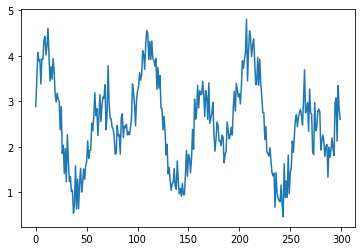

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def generate_ts(len):
  tf = 80 * np.pi
  t = np.linspace(0., tf, len)
  y = np.sin(t) + 0.8 * np.cos(.5 * t) + np.random.normal(0., 0.3, len) + 2.5
  return y.tolist()
if __name__ == '__main__':
  ts = generate_ts(2000)
  plt.plot(ts[:300])
  plt.show()

In [8]:
# Import
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
# from ch5.enc_dec.model import EncoderDecoder
# from ch5.enc_dec.ts import generate_ts
# from ch5.training_datasets import sliding_window

In [9]:
# Making script reproducible
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [10]:
# Global parameters
# synthetic time series length
ts_len = 2000
# lstm hidden size
hidden_size = 64
# test dataset size
test_ds_len = 200
# training epochs
epochs = 500
# input history
ts_history_len = 240
# prediction length
ts_target_len = 60

In [12]:
# SLiding window
def sliding_window(ts, features):
  X = []
  Y = []
  for i in range(features + 1, len(ts) + 1):
    X.append(ts[i - (features + 1):i - 1])
    Y.append([ts[i - 1]])
  return X, Y
if __name__ == '__main__':
  ts = list(range(6))
  X, Y = sliding_window(ts, 3)
  print(f'Time series: {ts}')
  print(f'X: {X}')
  print(f'Y: {Y}')

Time series: [0, 1, 2, 3, 4, 5]
X: [[0, 1, 2], [1, 2, 3], [2, 3, 4]]
Y: [[3], [4], [5]]


In [13]:
# Generating datasets
ts = generate_ts(ts_len)
X, Y = sliding_window(ts, ts_history_len, ts_target_len)
ds_len = len(X)
def to_tensor(data):
  return torch.tensor(data = data)\
    .unsqueeze(2)\
    .transpose(0, 1).float()
x_train = to_tensor(X[:ds_len - test_ds_len])
y_train = to_tensor(Y[:ds_len - test_ds_len])
x_test = to_tensor(X[ds_len - test_ds_len:])
y_test = to_tensor(Y[ds_len - test_ds_len:])

TypeError: ignored

In [14]:
# Initialising Encoder-decoder model
model = EncoderDecoder(hidden_size = hidden_size)

In [15]:
# Training
model.train()
model.train_model(x_train, y_train, epochs, ts_target_len,
           method = 'mixed_teacher_forcing',
           tfr = .05, lr = .005)

AttributeError: ignored

In [18]:
# Prediction
model.eval()
predicted = model.predict(x_test, ts_target_len)


AttributeError: ignored

In [1]:
# Visualising result
fig, ax = plt.subplots(nrows = 3, ncols = 1)
fig.set_size_inches(7.5, 6)
for col in ax:
  r = random.randint(0, test_ds_len)
  in_seq = x_test[:, r, :].view(-1).tolist()
  target_seq = y_test[:, r, :].view(-1).tolist()
  pred_seq = predicted[:, r, :].view(-1).tolist()
  x_axis = range(len(in_seq) + len(target_seq))
  col.set_title(f'Test Sample: {r}')
  col.axis('off')
  col.plot(x_axis[:], in_seq + target_seq, color = 'blue')
  col.plot(x_axis[len(in_seq):],
      pred_seq,
      label = 'predicted',
      color = 'orange',
      linewidth = 3)
  col.vlines(len(in_seq), 0, 6, color = 'grey')
  col.legend(loc = "upper right")
plt.show()

NameError: ignored

#Implementing the temporal convolutional network

In [2]:
# import libraries
import torch.nn as nn
from torch.nn.utils import weight_norm

In [3]:
# Crop layer
# The crop layer is responsible for trimming the tensor from the right when creating a causal convolution operation:
class Crop(nn.Module):
  def __init__(self, crop_size):
    super(Crop, self).__init__()
    self.crop_size = crop_size
  def forward(self, x):
    return x[:, :, :-self.crop_size].contiguous()

In [4]:
# Temporal Causal Layer
class TemporalCasualLayer(nn.Module):
  def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout = 0.2):
    super(TemporalCasualLayer, self).__init__()
    padding = (kernel_size - 1) * dilation
    conv_params = {
      'kernel_size': kernel_size,
      'stride': stride,
      'padding': padding,
      'dilation': dilation
    }
    self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, **conv_params))
    self.crop1 = Crop(padding)
    self.relu1 = nn.ReLU()
    self.dropout1 = nn.Dropout(dropout)
    self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, **conv_params))
    self.crop2 = Crop(padding)
    self.relu2 = nn.ReLU()
    self.dropout2 = nn.Dropout(dropout)
    self.net = nn.Sequential(self.conv1, self.crop1, self.relu1, self.dropout1, self.conv2, self.crop2, self.relu2, self.dropout2)
    self.bias = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
    self.relu = nn.ReLU()
  def forward(self, x):
    y = self.net(x)
    b = x if self.bias is None else self.bias(x)
    return self.relu(y + b)

In [5]:
# Implementing temporal convolutional network
class TemporalConvolutionNetwork(nn.Module):
  def __init__(self, num_inputs, num_channels, kernel_size = 2, dropout = 0.2):
    super(TemporalConvolutionNetwork, self).__init__()
    layers = []
    num_levels = len(num_channels)
    tcl_param = {
      'kernel_size': kernel_size,
      'stride': 1,
      'dropout': dropout
    }
    for i in range(num_levels):
      dilation = 2**i
      in_ch = num_inputs if i == 0 else num_channels[i - 1]
      out_ch = num_channels[i]
      tcl_param['dilation'] = dilation
      tcl = TemporalCasualLayer(in_ch, out_ch, **tcl_param)
      layers.append(tcl)
    self.network = nn.Sequential(*layers)
  def forward(self, x):
    return self.network(x)

In [6]:
# TCN prediction model
# TCN does not represent a predictive model. To create a single-step prediction model based on TCN, we need to add one linear layer after applying TCN layer:

class TCN(nn.Module):
  def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
    super(TCN, self).__init__()
    self.tcn = TemporalConvolutionNetwork(input_size, num_channels, kernel_size = kernel_size, dropout = dropout)
    self.linear = nn.Linear(num_channels[-1], output_size)
  def forward(self, x):
    y = self.tcn(x)
    return self.linear(y[:, :, -1])

To demonstrate the capabilities of TCN, we will consider the following multivariate input time series problem:

Yt = Yt-1 + R1,t-1 + R1,t-2 + 4R2,t-3(R3,t-4 + R3,t-6),

Where:

R1,t – Is a random variable

R2,t – Is a random variable

R3,t – is a random variable which outputs 1 with 0.25 probability and 0 otherwise

In [9]:
# import
import copy
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
# from ch5.tcn.dummy import Dummy
# from ch5.tcn.model import TCN
# from ch5.tcn.ts import generate_time_series
# from ch5.training_datasets import get_training_datasets, ts_diff, ts_int

In [10]:
# Making script reproducible
seed = 12
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [11]:
# Global parameters
# time series input
features = 20
# training epochs
epochs = 1_000
# synthetic time series dataset
ts_len = 5_000
# test dataset size
test_len = 300
# temporal casual layer channels
channel_sizes = [10] * 4
# convolution kernel size
kernel_size = 5
dropout = .0

In [12]:
# Generating time series
ts = generate_time_series(ts_len)

NameError: ignored

In [13]:
# Preprocessing
# We will use differencing preprocessing for this time series:
ts_diff_y = ts_diff(ts[:, 0])
ts_diff = copy.deepcopy(ts)
ts_diff[:, 0] = ts_diff_y

NameError: ignored

In [ ]:
# Preparing datasets
x_train, x_val, x_test, y_train, y_val, y_test =\
  get_training_datasets(ts_diff, features, test_len)
x_train = x_train.transpose(1, 2)
x_val = x_val.transpose(1, 2)
x_test = x_test.transpose(1, 2)
y_train = y_train[:, :, 0]
y_val = y_val[:, :, 0]
y_test = y_test[:, :, 0]
train_len = x_train.size()[0]

In [ ]:
# Initialising the model
model_params = {
  'input_size': 4,
  'output_size': 1,
  'num_channels': channel_sizes,
  'kernel_size': kernel_size,
  'dropout': dropout
}
model = TCN(**model_params)

In [ ]:
# Defining optimiser and loss function
optimizer = torch.optim.Adam(params = model.parameters(), lr = .005)
mse_loss = torch.nn.MSELoss()

In [ ]:
# Training
best_params = None
min_val_loss = sys.maxsize
training_loss = []
validation_loss = []
for t in range(epochs):
  prediction = model(x_train)
  loss = mse_loss(prediction, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  val_prediction = model(x_val)
  val_loss = mse_loss(val_prediction, y_val)
  training_loss.append(loss.item())
  validation_loss.append(val_loss.item())
  if val_loss.item() < min_val_loss:
    best_params = copy.deepcopy(model.state_dict())
    min_val_loss = val_loss.item()
  if t % 100 == 0:
    diff = (y_train - prediction).view(-1).abs_().tolist()
    print(f'epoch {t}. train: {round(loss.item(), 4)}, '
      f'val: {round(val_loss.item(), 4)}')

In [ ]:
# Training progress
plt.title('Training Progress')
plt.yscale("log")
plt.plot(training_loss, label = 'train')
plt.plot(validation_loss, label = 'validation')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# WORKING WITH TIMESERIESDATASET

In [3]:
!pip install pytorch_forecasting
from pytorch_forecasting import TimeSeriesDataSet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 14.3 MB/s eta 0:00:00
  Preparing 

In [4]:
import os
import numpy as np
import pandas as pd
from pytorch_forecasting import DeepAR
random.seed(1)
torch.manual_seed(1)
